<a href="https://colab.research.google.com/github/JuliaLorenzetti/data-science/blob/main/CodingTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 2

- Deadline (upload to Ilias): 2022-05-15 24:00
- Solutions in lecture on 2022-05-18
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples


## Subtasks (maximum 12.5 points)

- Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points] 
- With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]
- Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points] 
- Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

Work in teams and have fun ! 

importing libraries and modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as skf
import skimage.morphology as skm
from google.colab import drive
drive.mount('/content/drive')
!pip install pillow_heif 
from PIL import Image
import pillow_heif

Mounted at /content/drive
     |████████████████████████████████| 13.1 MB 4.9 MB/s 


1. conversion to png format

In [ ]:
for i in range (5379, 5394, 1):
  url_pre  = '/content/drive/MyDrive/Data Science/images coding task 2/'
  url_name = ''.join(['IMG_', str(i), '.HEIC'])
  heif_file = pillow_heif.read(url_pre+url_name)
  image = Image.frombytes(heif_file.mode,heif_file.size,heif_file.data,"raw",)
  url_name = url_name.split('.')[0]+'.png'
  image.save(url_pre+url_name, format="png")

2. conversion to black and white image

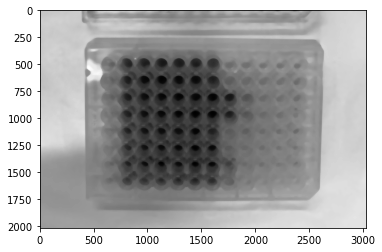

In [6]:
# resizing and smoothing the image
url_pre  = '/content/drive/MyDrive/Data Science/images coding task 2/'
url_name = 'IMG_5379.png'
imageRGB  = io.imread(url_pre+url_name)
image = imageRGB[:,:,2]
image = image[image.shape[0]//2:image.shape[0],:]
image_mean = skf.median(image,selem=skm.disk(20))
plt.imshow(image_mean, cmap ='gray')
plt.show()

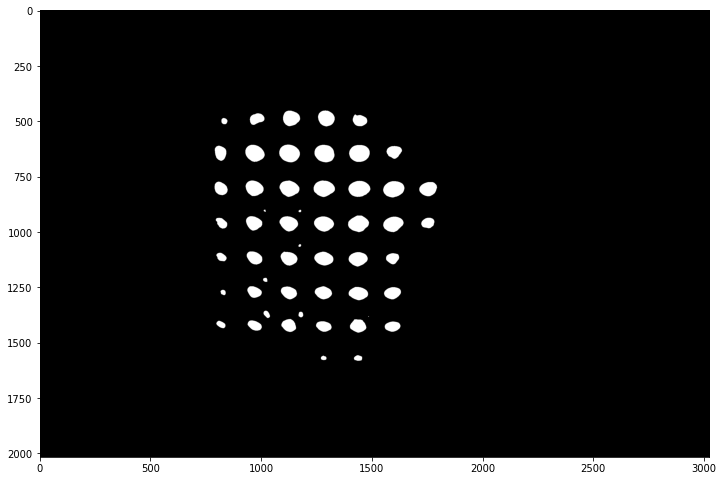

In [17]:
# intensity thresholding 
threshold_manual = 52
image_threshold = image_mean<threshold_manual
plt.figure(figsize=(12, 12))
plt.imshow(image_threshold, cmap ='gray')
plt.show()